# 爬取股票信息

In [61]:
import requests
stock_code = "GILT" # GILT是Gilat Satellite Networks Ltd 的股票代码，主要销售市场在以色列
url = 'https://finance.yahoo.com/quote/%s/history?p=%s'% (stock_code, stock_code) # 构造完整的获取股票历史信息的网页URL
r = requests.get(url) # 获取上述URL对应的网页
print(r)

<Response [200]>


### 数据抓取

In [62]:
import re
result = re.findall('"HistoricalPriceStore":{"prices":(.*?),"isPending"', r.text) # 定义正则表达式，找到我们需要的股票历史数据
if result is not None:  # 如果没有找到数据，prices就是None
    print(result)

['[{"date":1610721000,"open":7.619999885559082,"high":7.71999979019165,"low":7.150000095367432,"close":7.320000171661377,"volume":870100,"adjclose":7.320000171661377},{"date":1610634600,"open":7.090000152587891,"high":7.590000152587891,"low":6.980000019073486,"close":7.5,"volume":1545100,"adjclose":7.5},{"date":1610548200,"open":6.929999828338623,"high":6.949999809265137,"low":6.679999828338623,"close":6.809999942779541,"volume":362900,"adjclose":6.809999942779541},{"date":1610461800,"open":6.800000190734863,"high":6.949999809265137,"low":6.789999961853027,"close":6.849999904632568,"volume":500100,"adjclose":6.849999904632568},{"date":1610375400,"open":7.010000228881836,"high":7.010000228881836,"low":6.75,"close":6.809999942779541,"volume":626200,"adjclose":6.809999942779541},{"date":1610116200,"open":7.190000057220459,"high":7.230000019073486,"low":6.880000114440918,"close":6.989999771118164,"volume":681000,"adjclose":6.989999771118164},{"amount":0.63,"date":1610116200,"type":"DIVIDEN

In [63]:
prices = eval(result[0]) # 从查找结果中提取需要的股票价格
prices[1]

{'date': 1610634600,
 'open': 7.090000152587891,
 'high': 7.590000152587891,
 'low': 6.980000019073486,
 'close': 7.5,
 'volume': 1545100,
 'adjclose': 7.5}

### 数据处理（数据清洗等）

In [64]:
quotes = [item for item in prices if not 'type' in item] # 通过肉眼观察，我们可以看到上述结果中有一些比较奇怪的数据，需要进行数据清洗
quotes[1] 

{'date': 1610634600,
 'open': 7.090000152587891,
 'high': 7.590000152587891,
 'low': 6.980000019073486,
 'close': 7.5,
 'volume': 1545100,
 'adjclose': 7.5}

In [65]:
from datetime import date
list1 = []
for i in range(len(quotes)): # 将数据中date字段中的时间戳转换成更加直观的日期格式
    x = date.fromtimestamp(quotes[i]['date'])
    y = date.strftime(x,'%Y-%m-%d')
    list1.append(y)
list1[1]

'2021-01-14'

In [55]:
import pandas as pd
# 使用pandas模块提供的DataFrame对象存储股票数据，并将刚才的日期作为索引列的值
quotesdf_ori = pd.DataFrame(quotes, index = list1)
quotesdf_ori

,date,open,high,low,close,volume,adjclose
2021-01-15,1610721000,7.62,7.72,7.15,7.32,870100,7.320000
2021-01-14,1610634600,7.09,7.59,6.98,7.50,1545100,7.500000
2021-01-13,1610548200,6.93,6.95,6.68,6.81,362900,6.810000
2021-01-12,1610461800,6.80,6.95,6.79,6.85,500100,6.850000
2021-01-11,1610375400,7.01,7.01,6.75,6.81,626200,6.810000
...,...,...,...,...,...,...,...
2020-01-23,1579789800,9.94,10.23,9.74,10.18,133000,8.785993
2020-01-22,1579703400,9.99,10.10,9.69,9.95,279900,8.587487
2020-01-21,1579617000,9.65,10.76,9.54,10.29,471500,8.880930
2020-01-17,1579271400,9.20,9.68,9.15,9.15,180800,7.897037


In [66]:
# 去掉原始数据中的时间戳数据，并按照月份进行分组
quotesdf = quotesdf_ori.drop(['date'], axis = 1)  # axis=1表示从某列中删除，axis=0表示从某行中删除
templist = []
for i in range(len(quotesdf)):
    temp = time.strptime(quotesdf.index[i],"%Y-%m-%d") # strptime()函数根据指定的格式把一个时间字符串解析为时间对象
    templist.append("{}/{:02}".format(temp.tm_year%100,temp.tm_mon))  # "{:02}"表示将月份改成2位且带前导0的格式
tempdf = quotesdf.copy()
tempdf['month'] = templist
tempdf

,open,high,low,close,volume,adjclose,month
2021-01-15,7.62,7.72,7.15,7.32,870100,7.320000,21/01
2021-01-14,7.09,7.59,6.98,7.50,1545100,7.500000,21/01
2021-01-13,6.93,6.95,6.68,6.81,362900,6.810000,21/01
2021-01-12,6.80,6.95,6.79,6.85,500100,6.850000,21/01
2021-01-11,7.01,7.01,6.75,6.81,626200,6.810000,21/01
...,...,...,...,...,...,...,...
2020-01-23,9.94,10.23,9.74,10.18,133000,8.785993,20/01
2020-01-22,9.99,10.10,9.69,9.95,279900,8.587487,20/01
2020-01-21,9.65,10.76,9.54,10.29,471500,8.880930,20/01
2020-01-17,9.20,9.68,9.15,9.15,180800,7.897037,20/01


In [67]:
# 通过对月份数据进行分组操作，求出Gilat Satellite Networks Ltd 近一年来，每个月的平均收盘价
avgPrices = tempdf.groupby('month').close.mean()
avgPrices

month
20/01    9.783636
20/02    9.675263
20/03    7.272273
20/04    8.120952
20/05    8.411000
20/06    6.638182
20/07    5.495455
20/08    5.528571
20/09    5.506667
20/10    5.425000
20/11    5.723000
20/12    6.255909
21/01    7.125000
Name: close, dtype: float64

### 数据可视化

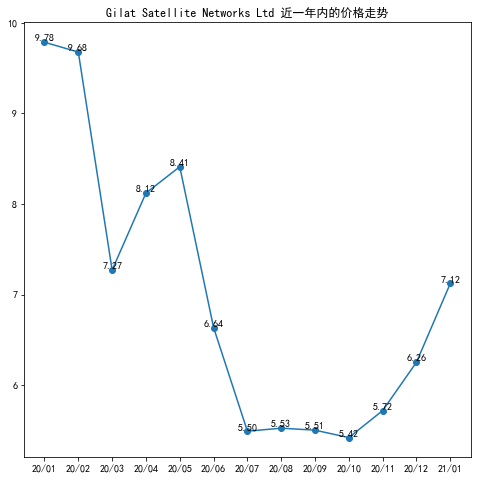

In [68]:
import matplotlib.pyplot as plt
# 将上述数据表示成折线图
x = list(avgPrices.index)
y = avgPrices.values
plt.figure(figsize=(8,8))
plt.plot(x, y,"-o")
# from matplotlib.font_manager import FontProperties
# myfont = FontProperties(fname=r"//System//Library//Fonts//STHeiti Medium.ttc", size=16)
# # 为每一个点加上数据标签
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.title('Gilat Satellite Networks Ltd 近一年内的价格走势') # 在图表中加入中文标题("Gilat Satellite Networks Ltd 近一年内的价格走势")
for a,b in zip(x,y): 
    plt.text(a,b,"%.2f"%b,ha='center',va='bottom')
plt.show()